In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy.integrate as integrate

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

import ipywidgets as widgets
# import ipyvolume as ipv

/var/folders/pk/4stgl7rx1rd40xnz4plktxy00000gn/T/ipykernel_60639/427212921.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
import scipy.special as spe

$R_{nl}(r) = \sqrt{\Big(\frac{2}{n a_0}\Big)^3 \frac{(n-l-1)!}{2n (n+l)!}} e^{-r/n a_0} \Big( \frac{2r}{na_0}\Big)^l  \cdot L^{2l+1}_{n-l-1} \Big(\frac{2r}{n a_0} \Big)$

$a_0 = 1, h = 1, m_e = 1, e = 1$

In [5]:
def psi_R(r, n=1, l=0):
    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) / (2.0*n*spe.factorial(n+l)))

    laguerre = spe.assoc_laguerre(2.0*r/n, n-l-1, 2*l+1)

    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

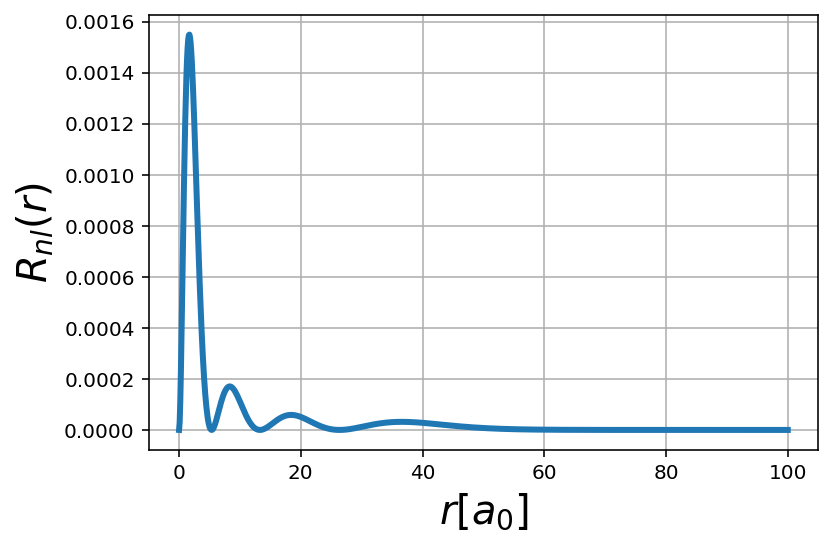

In [6]:
r = np.linspace(0, 100, 1000)
R = psi_R(r, n=5, l=1)

plt.plot(r, R**2, lw=3)
plt.xlabel("$r [a_0]$", fontsize=20)
plt.ylabel('$R_{nl}(r)$', fontsize=20)

plt.grid("True")

In [8]:
nmax=10

@widgets.interact(n = np.arange(1, nmax, 1), l=np.arange(0, nmax-1, 1))

def plot_radial(n=1, l=0):
    r = np.linspace(0, 250, 10000)

    psi2 = psi_R(r, n, l) ** 2 * (r**2)

    plt.plot(r, psi2, lw=2, color="red")

    plt.xlabel("$r [a_0]$", fontsize=20)
    plt.ylabel('$R_{nl}$', fontsize=20)

    rmax = n**2*(1+0.5*(1-l*(l+1)/n**2))

    plt.xlim([0, 2*rmax])

interactive(children=(Dropdown(description='n', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

$Y_{lm}(\theta,\phi) = \Theta_{lm}(\theta) \Phi_m (\phi) = \sqrt{\frac{2l+1}{4\pi} \frac{(l-m)!}{(l+m)!} } P_{lm}(cos \theta) \cdot e^{im\phi}$

In [16]:
def psi_ang(phi, theta, l=0, m=0):
    sphHarm = spe.sph_harm(m, l, phi, theta)

    return sphHarm.real

In [17]:
phi, theta = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)

phi, theta = np.meshgrid(phi, theta)

Ylm = psi_ang(theta, phi, l=2, m=0)

In [18]:
x = np.sin(phi) * np.cos(theta) * abs(Ylm)
y = np.sin(phi) * np.sin(theta) * abs(Ylm)
z = np.cos(phi) * abs(Ylm)

(-1.0, 1.0)

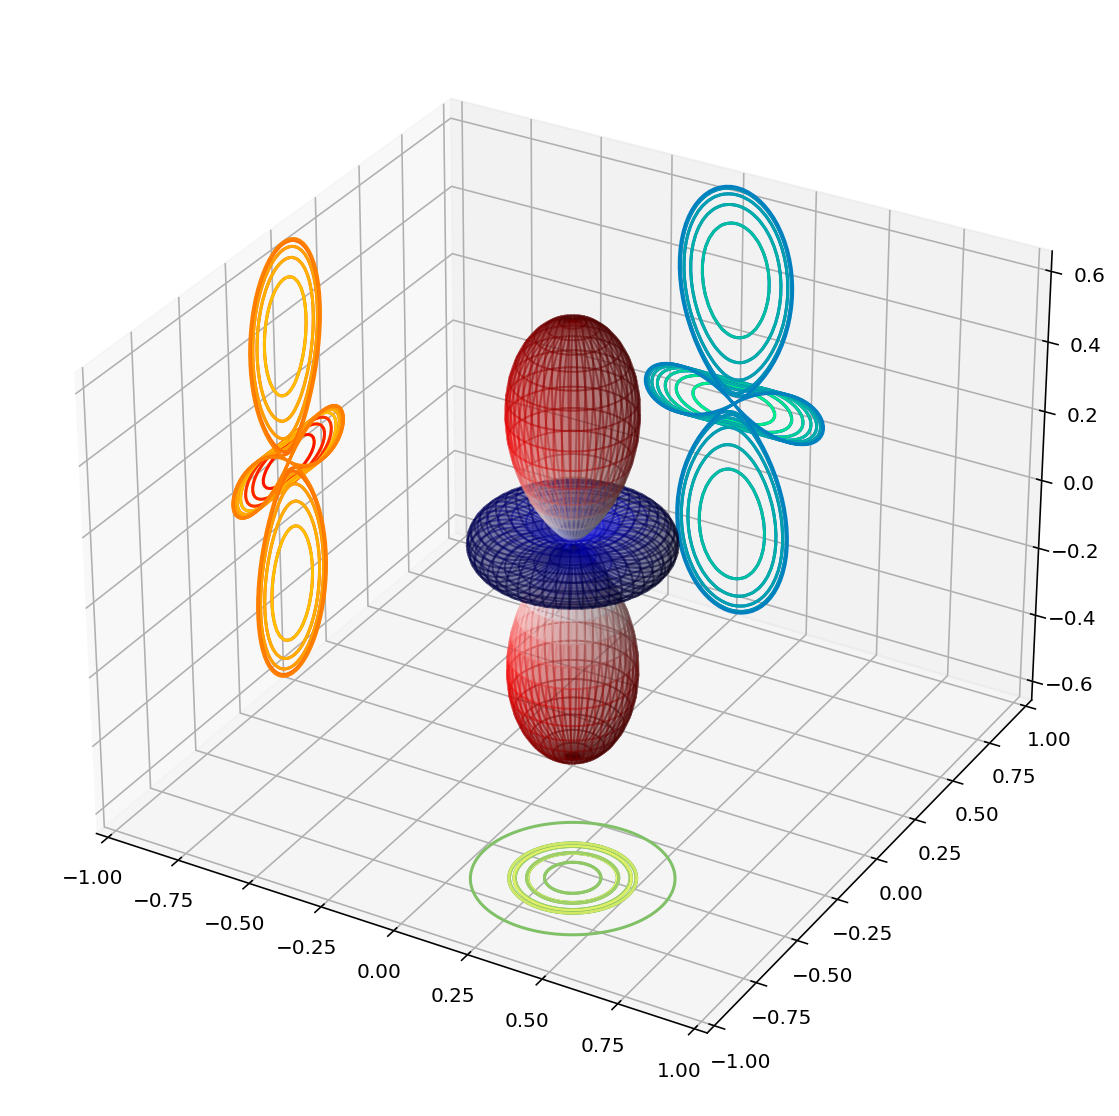

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

fcolors = (Ylm - Ylm.min()) / (Ylm.max() - Ylm.min())

ax.plot_surface(x, y, z, facecolors=cm.seismic(fcolors), alpha=0.3)

cset = ax.contour(x, y, z, 20, zdir="z", offset=-1, cmap="summer")
cset = ax.contour(x, y, z, 20, zdir="y", offset=1, cmap="winter")
cset = ax.contour(x, y, z, 20, zdir="x", offset=-1, cmap="autumn")

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_ylim(-1, 1)

In [21]:
fig.savefig("orbital.png")